In [1]:
from eda_imports import *
from adjustText import adjust_text

In [5]:
df1 = pd.read_csv('../benchmark_transcriptome/tcga-run-4/benchmark-gradboost.pr_curve.csv')
df1['scope'] = 'transcriptome'
df2 = pd.read_csv('../benchmark_114genes/tcga-run-4/benchmark-gradboost.pr_curve.granular.csv')
df2['scope'] = '114genes'

In [6]:
df_cat = pd.concat([df1, df2]).query('tree_max_depth == 3')

In [7]:
df_cat['sample_id'] = df_cat.sample_id.str.replace('_114genes', '')

0,1,2,3,

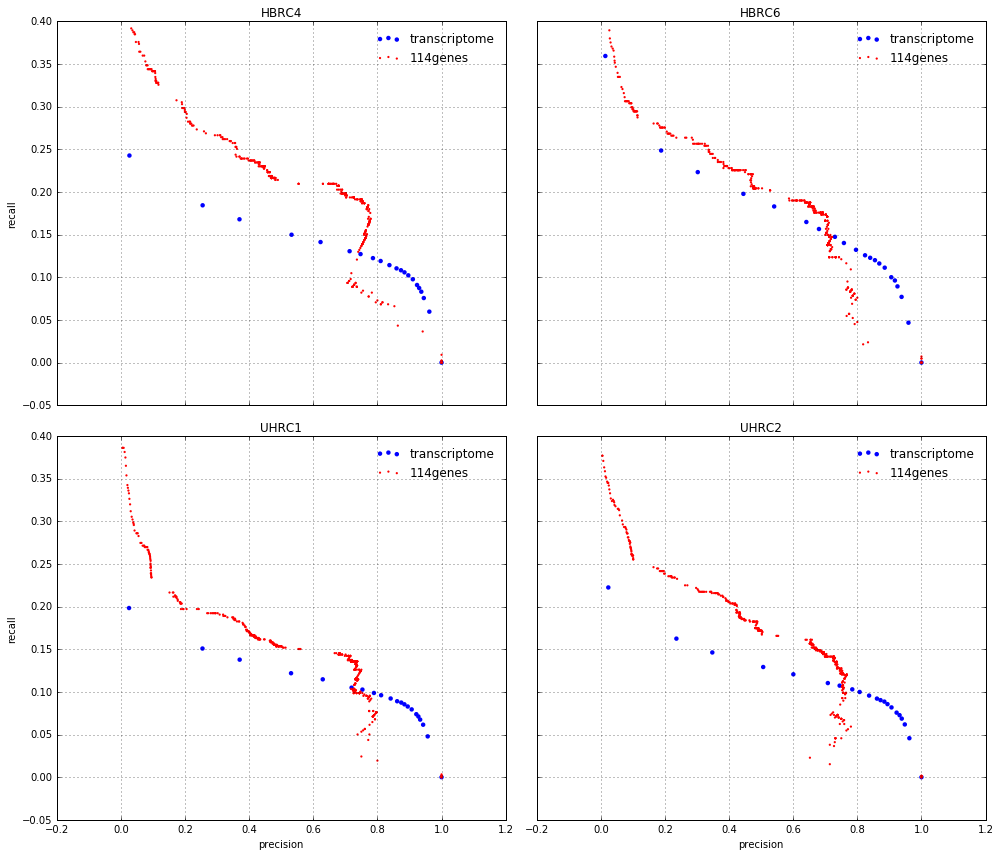

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), 
                         sharex=True, sharey=True
                        )
axes = axes.ravel()

sids = np.sort(df_cat.sample_id.unique())
for k, sid in enumerate(sids):
    print(k, end=',')
    ax = axes[k]
    
    for scope, color, marker in zip(
        ['transcriptome', '114genes'], ['blue', 'red'], ['o', '.']):
        _df = df_cat.query(f'sample_id == "{sid}"').query(f'scope == "{scope}"')
        _df.plot.scatter(
            'prec', 'recall', marker=marker, alpha=1, edgecolor='none', color=color,
            ax=ax, label=scope)

        
    ax.set_title(sid)
    
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.grid()
    
    ax.legend(loc='best', framealpha=0)
    
    ax.set_xlim(-0.2,  1.2)
    ax.set_ylim(-0.05, 0.4)
    
#     adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
plt.tight_layout()